In [62]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'arial'
# plt.style.use('seaborn-dark-palette')

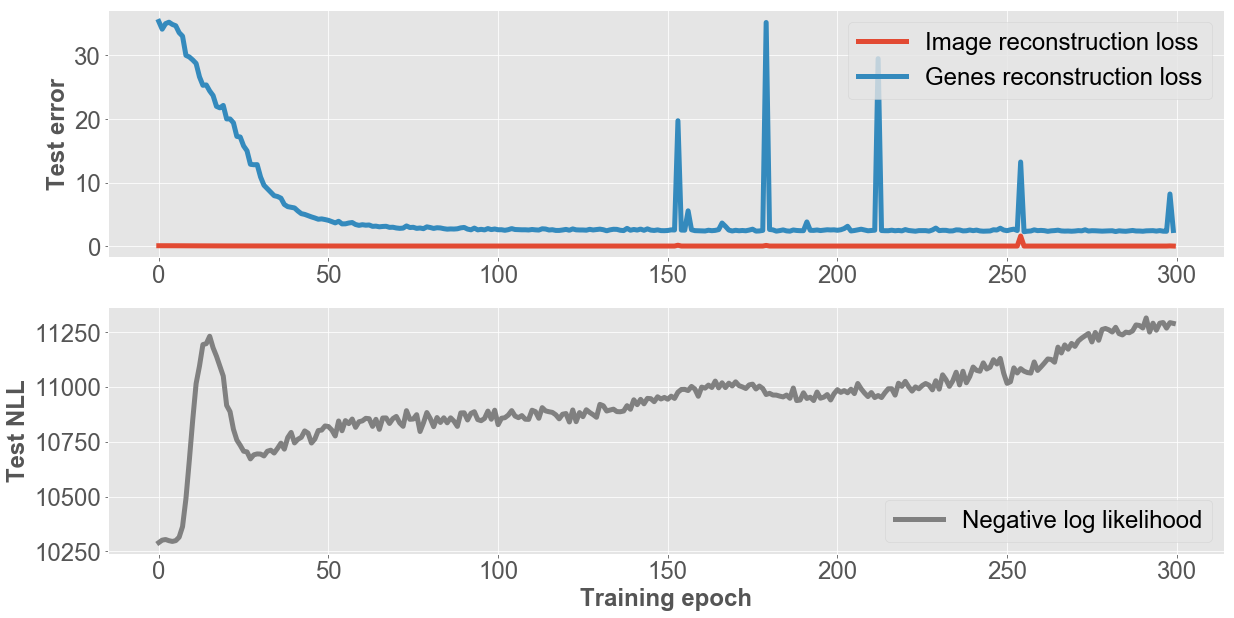

In [67]:
fname = 'experiments/test/out.txt'

with open(fname) as out:
    lines = [l.strip() for l in out]

idx = None
for i, l in enumerate(lines):
    if l == 'Training model.':
        idx = i+2
        
losses = lines[idx:]
img_curve = []
gen_curve = []
nll_curve = []
for l in losses:
    try:
        parts = l.split('\t')
        if len(parts) == 12:
#             print(parts[7], parts[8], parts[5])
            img_curve.append(float(parts[8]))
            gen_curve.append(float(parts[9]))
            nll_curve.append(float(parts[11]))
    except:
        pass

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20, 10)

n = 400
img_curve = img_curve[:n]
gen_curve = gen_curve[:n]
nll_curve = nll_curve[:n]

x = list(range(len(img_curve)))

FS = 24
LW = 5

y = img_curve
ax1.plot(x, y,label='Image reconstruction loss', linewidth=LW)
y = gen_curve
ax1.plot(x, y, label='Genes reconstruction loss', linewidth=LW)
ax1.set_ylabel('Test error', fontsize=FS, fontweight='bold')
ax1.legend(fontsize=FS)
ax1.tick_params(axis='both', which='major', labelsize=FS)

y = nll_curve
ax2.plot(x, y, color='gray', label='Negative log likelihood', linewidth=LW)
ax2.set_xlabel('Training epoch', fontsize=FS, fontweight='bold')
ax2.set_ylabel('Test NLL', fontsize=FS, fontweight='bold')
ax2.legend(fontsize=FS)
ax2.tick_params(axis='both', which='major', labelsize=FS)